In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import seaborn as sns



import keras


In [15]:
lstm_net = keras.Sequential(
    [
    
    keras.layers.LSTM(50, return_sequences = True, input_shape = (inputs.shape[1], 1)),
    keras.layers.Dropout(0.1),
    keras.layers.LSTM(50, return_sequences = True),
    keras.layers.Dropout(0.1),
    keras.layers.LSTM(50, return_sequences = True),
    keras.layers.Dropout(0.1),
    keras.layers.LSTM(50, return_sequences = True),
    keras.layers.Dropout(0.1),
    keras.layers.LSTM(50, return_sequences = True),
    keras.layers.Dropout(0.1),
    keras.layers.LSTM(50, return_sequences = True),
    keras.layers.Dropout(0.1),
    keras.layers.LSTM(50, return_sequences = True),
    keras.layers.Dropout(0.1),


    keras.layers.LSTM(50),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(units=1)

    ]
)

In [18]:
data = web.get_data_yahoo('NVDA',start = "2010-01-01",
                            end = "2022-02-13")

train = web.get_data_yahoo("NVDA",
                            start = "2010-01-01",
                            end = "2022-01-14")

test = web.get_data_yahoo("NVDA",
                            start = "2022-01-14",
                            end = "2022-02-13")


train.shape

(3031, 6)

In [19]:
train_arr = np.array(train.Close).reshape(-1,1)
train_arr.shape

(3031, 1)

In [20]:
normalizer = MinMaxScaler((0,1))
normalized_train = normalizer.fit_transform(train)

In [21]:
inputs = list()
targets = list()

lr_days = 60
train_len = train_arr.shape[0]

for day in range(lr_days, train_len):
    
    inputs.append(normalized_train[day-lr_days:day, 0])
    
    targets.append(normalized_train[day, 0])
    
inputs = np.array(inputs)
inputs = np.reshape(inputs, (inputs.shape[0], inputs.shape[1], 1))
targets = np.array(targets)
print(inputs.shape)
print(targets)#5486

(2971, 60, 1)
[0.00623897 0.00626802 0.00614455 ... 0.82417586 0.82083478 0.78356079]


In [22]:
inputs.shape[1]

60

In [23]:
lstm_net.compile(
    optimizer = 'adam', 
    metrics = ['accuracy'],
    loss = 'mean_squared_error')

In [36]:

lstm_net.fit(inputs, targets, epochs = 150, batch_size = 32)

Epoch 1/150
93/93 [==============================] - 9s 99ms/step - loss: 2.4717e-04 - accuracy: 6.7317e-04
Epoch 2/150
93/93 [==============================] - 9s 101ms/step - loss: 2.1548e-04 - accuracy: 6.7317e-04
Epoch 3/150
93/93 [==============================] - 11s 118ms/step - loss: 1.8519e-04 - accuracy: 6.7317e-04
Epoch 4/150
93/93 [==============================] - 10s 107ms/step - loss: 2.0075e-04 - accuracy: 6.7317e-04
Epoch 5/150
93/93 [==============================] - 9s 99ms/step - loss: 1.9466e-04 - accuracy: 6.7317e-04
Epoch 6/150
93/93 [==============================] - 9s 95ms/step - loss: 2.0890e-04 - accuracy: 6.7317e-04
Epoch 7/150
93/93 [==============================] - 9s 99ms/step - loss: 2.3810e-04 - accuracy: 6.7317e-04
Epoch 8/150
93/93 [==============================] - 9s 102ms/step - loss: 1.9237e-04 - accuracy: 6.7317e-04
Epoch 9/150
93/93 [==============================] - 9s 99ms/step - loss: 1.8900e-04 - accuracy: 6.7317e-04
Epoch 10/150
93/93 [==

93/93 [==============================] - 22s 239ms/step - loss: 1.3004e-04 - accuracy: 6.7317e-04
Epoch 76/150
93/93 [==============================] - 25s 271ms/step - loss: 1.6776e-04 - accuracy: 6.7317e-04
Epoch 77/150
93/93 [==============================] - 17s 186ms/step - loss: 1.9040e-04 - accuracy: 6.7317e-04
Epoch 78/150
93/93 [==============================] - 21s 225ms/step - loss: 1.5758e-04 - accuracy: 6.7317e-04
Epoch 79/150
93/93 [==============================] - 17s 185ms/step - loss: 1.7404e-04 - accuracy: 6.7317e-04
Epoch 80/150
93/93 [==============================] - 16s 175ms/step - loss: 1.5214e-04 - accuracy: 6.7317e-04
Epoch 81/150
93/93 [==============================] - 18s 198ms/step - loss: 1.8068e-04 - accuracy: 6.7317e-04
Epoch 82/150
93/93 [==============================] - 16s 176ms/step - loss: 1.6238e-04 - accuracy: 6.7317e-04
Epoch 83/150
93/93 [==============================] - 20s 187ms/step - loss: 2.0825e-04 - accuracy: 6.7317e-04
Epoch 84/150
9

93/93 [==============================] - 31s 339ms/step - loss: 1.7849e-04 - accuracy: 6.7317e-04
Epoch 149/150
93/93 [==============================] - 21s 225ms/step - loss: 1.6780e-04 - accuracy: 6.7317e-04
Epoch 150/150
93/93 [==============================] - 21s 229ms/step - loss: 1.8791e-04 - accuracy: 6.7317e-04


In [42]:
print(lstm_net.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 60, 50)            10400     
                                                                 
 dropout_8 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_9 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_9 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_10 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dropout_10 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_11 (LSTM)              (None, 60, 50)           

In [43]:
test_targets = np.array(test.Close).reshape(-1,1)
test_targets.shape


(20, 1)

In [44]:


days_all = data.shape[0]
days_test = test.shape[0]

days_rem = days_all-lr_days-days_test
test_x = normalizer.fit_transform(np.array(data.Close[days_rem:]).reshape(-1,1))

last_day = lr_days + days_test
test_i = list()
for day in range(lr_days, last_day):
    
    test_i.append(test_x[day-lr_days:day, 0])
    
test_i = np.array(test_i)

preds = normalizer.inverse_transform(lstm_net.predict(test_i))




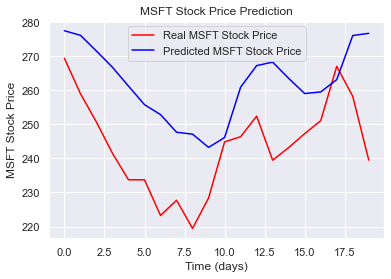

In [45]:
plt.plot(test_targets, color = 'red', label = 'Real MSFT Stock Price')
plt.plot(preds, color = 'blue', label = 'Predicted MSFT Stock Price')
plt.title('MSFT Stock Price Prediction')
plt.xlabel('Time (days)')
plt.ylabel('MSFT Stock Price')
plt.legend()
plt.show()

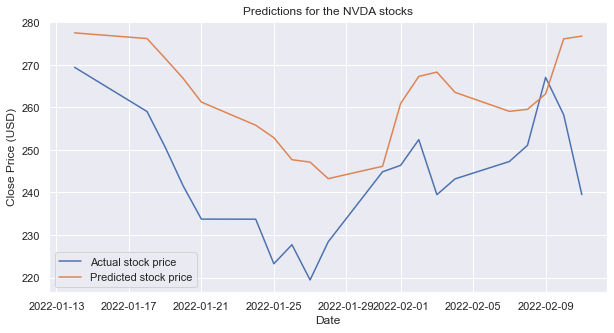

In [52]:
sns.set()
fig=plt.figure(figsize = (10,5))

sns.lineplot(x=test.index,y=test['Close'])
sns.lineplot(x=test.index,y=np.squeeze(preds)).set(title='Predictions for the NVDA stocks')
plt.legend(labels=["Actual stock price","Predicted stock price"])


plt.ylabel("Close Price (USD)")
plt.show()
fig.savefig('NVDA.png') 
plt.close(fig) 

In [166]:
# testing the code using other datasets